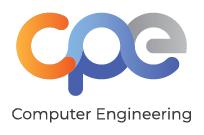

# Assignment5 Advanced Sorting Algorithm

## สรุปสิ่งที่ได้รับจากการเรียนในวันนี้

* กลยุทธ์ Divide and Conquer Algorithm คือ แนวคิดของการแบ่งปัญหาออกเป็นส่วนๆ และแก้ปัญหาจากจุดเล็กๆ จากนั้นค่อยนำมารวมกัน เช่น Binary Search, Merge Sort, Quick Sort
* กลยุทธ์ Recursion คือ แนวคิดของการเรียกใช้ฟังก์ชันตัวมันเองซ้ำๆ และ return ค่าออกมา โดยจะต้องมีเงื่อนไขที่ทำให้หลุดจาก Loop ไม่งั้นจะเกิด Infinite Loop ได้

* Sorting Algorithm มีทั้งหมดสองประเภทได้แก่
1. Comparison Sort คือการเรียงข้อมูลโดยวิธีการเปรียบเทียบค่า
เช่น Bubble Sort, Insertion Sort, Selection Sort, Merge Sort, Quick Sort
2. Distribution คือการเรียงข้อมูลโดยไม่มีการ Compare ค่า แต่เรียงโดยการจัดกลุ่ม
เช่น Radix Sort

### Advanced Sort ของวันนี้

* Merge Sort อยู่ในกลยุทธ์ Divide and Conquer หลักการคือการแบ่งข้อมูลให้เป็นส่วนย่อยๆเป็นสองฝั่งคือ ซ้ายกับขวา โดยแบ่งจากกึ่งกลางข้อมูลแล้วเมื่อแยกจนเหลือเพียงตัวเดียวให้ทำการเรียงก่อนจากนั้นจึงค่อยรวม Time Complexity เป็น O(nlogn)

* Quick Sort อยู่ในกลยุทธ์เป็น Divide and Conquer เช่นกัน แต่หลักการจะต่างจาก Merge Sort เพราะมันจะใช้ตำแหน่งที่แบ่ง (เรียกว่า Pivot) เป็นการสุ่มและแบ่งเป็น 3 เซ็ต คือ กลุ่มที่น้อยกว่า Pivot , กลุ่มที่มากกว่า Pivot และตัวมันเอง จากนั้นให้ทำการ Sort กลุ่มที่แยกออกมา คือ กลุ่มน้อยกว่าและมากกว่า มี Time Complexity เป็น O(nlogn)

* Radix Sort มีหลักการคือการสร้างถัง (bin) ขึ้นมาเพื่อเก็บตามจำนวนเลขที่มี เช่น เลขฐานสิบ ก็มีทั้งหมด 10 ถัง, เลขฐานสอง มี 2 ถัง โดยที่เราจะไล่ไปในชุดข้อมูลและเริ่มพิจารณาตั้งแต่หลักหน่วยจนถึงหลักสูงสุดที่มีในชุดข้อมูล จากนั้นนำเข้าถังทั้งหมด แล้วจึงนำทุกๆถังมาเรียงในชุดข้อมูลอีกรอบ บางครั้งจึงเรียกการ Sort นี้ว่า Bin Sort มี Time Complexity เป็น O(nk) โดยที่ k คือ จำนวนหลักที่สูงสุดในชุดข้อมูลนั้น

## Merge Sort

In [2]:
def merge(left,right,seq):
    i = j = 0
    while i + j < len(seq):
        if j == len(right) or (i < len(left) and left[i] < right[j]):
            seq[i + j] = left[i]
            i += 1
        else:
            seq[i + j] = right[j]
            j += 1
    return seq

def mergeSort(seq):
    n = len(seq)
    if n < 2:
        return
    mid = n // 2
    left = seq[0:mid]
    right = seq[mid:n]
    mergeSort(left)
    mergeSort(right)
    
    seq = merge(left,right,seq)
    return seq


> test and learn merge sort algorithm

In [3]:
list1 = [14, 145, 153, 12, 656, 4, 545,1]
mergeSort(list1)

[1, 4, 12, 14, 145, 153, 545, 656]

## Quick Sort

In [4]:
def quickSort(seq):
    if len(seq) < 2 :return seq
    pi = seq[0]
    seq = seq[1:]
    lo = [x for x in seq if x < pi]
    hi = [x for x in seq if x >= pi]
    return quickSort(lo) + [pi] + quickSort(hi)

> test and learn Quick sort algorithm

In [5]:
list1 = [14, 145, 153, 12, 656, 4, 545,1]
quickSort(list1)

[1, 4, 12, 14, 145, 153, 545, 656]

## Radix Sort

In [6]:
def radixSort(seq, numDigits):
    binArray = [None] * 10
    for k in range(10): binArray[k] = list()
    column = 1
    for d in range(numDigits):
        for key in seq:
            digit = (key // column) % 10
            binArray[digit].append(key)
        i = 0
        for bin in range(len(binArray)):
            while not len(binArray[bin]) == 0:
                seq[i] = binArray[bin].pop(0)
                i += 1
        column *= 10
    return seq

> test and learn Radix sort algorithm

In [7]:
list1 = [14, 145, 153, 12, 656, 4, 545,1]
radixSort(list1, 3)

[1, 4, 12, 14, 145, 153, 545, 656]

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice1-3 </span>: Compare and discuss about sorting
### ------------------------------------------------------------------------------------

**1 Compare sorting algorithm in average cases**

1. Make a new random array sequence with elements n = 100
2. Start timer
3. sort the random array sequence by Merge sort
4. Stop timer and keep record for elapsed times
5. Repeat step 2-4 again but change to the other algorithms (Quick sort and Radix sort)
6. Repeat step 1-5 again but now change the number of elements from 200, 500, 1000, 1500, 2000
7. Show the comparison in graph by plot elapesed time vs number of items

**2 Compare sorting algorithm in best cases**

1. Make a new random array sequence with elements n = 100
2. sort the sequence 
3. Start timer
4. sort the sorted array sequence by Merge sort
5. Stop timer and keep record for elapsed times
6. Repeat step 3-5 again but change to the other algorithms (Quick sort and Radix sort)
7. Repeat step 2-6 again but now change the number of elements from 200, 500, 1000, 1500, 2000
8. Show the comparison in graph by plot elapesed time vs number of items

**3 Compare sorting algorithm in worst cases**

1. Make a new random array sequence with elements n = 100
2. sort the sequence in reverse order
3. Start timer
4. sort the reverse-order sorted array sequence by Merge sort
5. Stop timer and keep record for elapsed times
6. Repeat step 3-5 again but change to the other algorithms (Quick sort and Radix sort)
7. Repeat step 2-6 again but now change the number of elements from 200, 500, 1000, 1500, 2000
8. Show the comparison in graph by plot elapesed time vs number of items

In [23]:
import time
import random
import matplotlib.pyplot as plt

def measure_execution_time(func, input_size):
    numbers = [random.randint(1, input_size) for _ in range(input_size)]
    start_time = time.time()
    result = func(numbers)
    end_time = time.time()
    return end_time - start_time

def measure_radix_execution_time(func, input_size):
    numbers = [random.randint(1, input_size) for _ in range(input_size)]
    start_time = time.time()
    result = func(numbers, len(str(input_size)))
    end_time = time.time()
    return end_time - start_time
# Experiment with different input sizes
input_sizes = [100, 500, 1000, 2000, 500, 10000]
mergeSort_times = []
quickSort_times = []
radixSort_times = []

for size in input_sizes:
    mergeSort_time = measure_execution_time(mergeSort, size)
    quickSort_time = measure_execution_time(quickSort, size)
    radixSort_time = measure_radix_execution_time(radixSort, size)
    mergeSort_times.append(mergeSort_time)
    quickSort_times.append(quickSort_time)
    radixSort_times.append(radixSort_time)

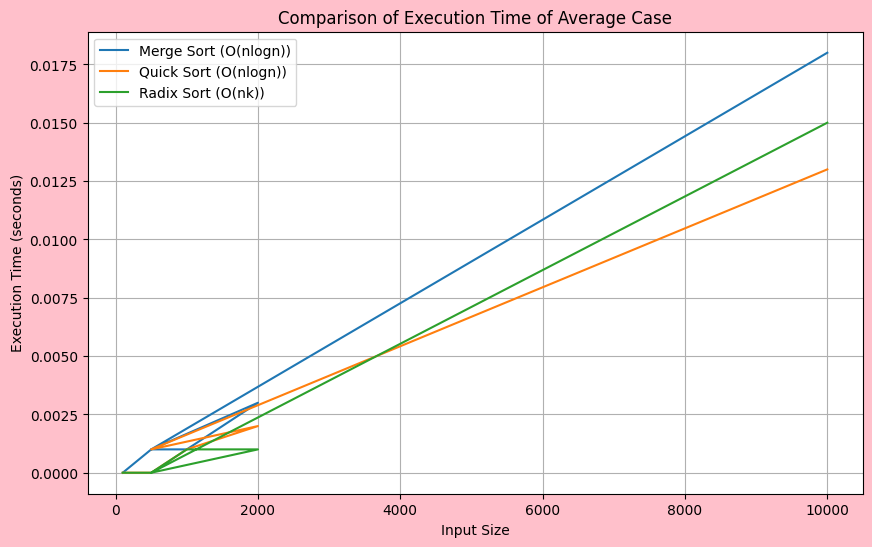

In [24]:
plt.figure(figsize=(10, 6),facecolor= 'pink')
plt.plot(input_sizes, mergeSort_times, label='Merge Sort (O(nlogn))')
plt.plot(input_sizes, quickSort_times, label='Quick Sort (O(nlogn))')
plt.plot(input_sizes, radixSort_times, label='Radix Sort (O(nk))')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Comparison of Execution Time of Average Case')
plt.grid(True)
plt.show()

In [10]:
import time
import matplotlib.pyplot as plt

def measure_execution_time(func, input_size):
    numbers = [ i for i in range(input_size)]
    start_time = time.time()
    result = func(numbers)
    end_time = time.time()
    return end_time - start_time

def measure_radix_execution_time(func, input_size):
    numbers = [ i for i in range(input_size)]
    start_time = time.time()
    result = func(numbers, len(str(input_size)))
    end_time = time.time()
    return end_time - start_time
# Experiment with different input sizes
input_sizes = [100, 200, 500, 1000, 1500, 2000]
mergeSort_times = []
quickSort_times = []
radixSort_times = []

for size in input_sizes:
    mergeSort_time = measure_execution_time(mergeSort, size)
    quickSort_time = measure_execution_time(quickSort, size)
    radixSort_time = measure_radix_execution_time(radixSort, size)
    mergeSort_times.append(mergeSort_time)
    quickSort_times.append(quickSort_time)
    radixSort_times.append(radixSort_time)

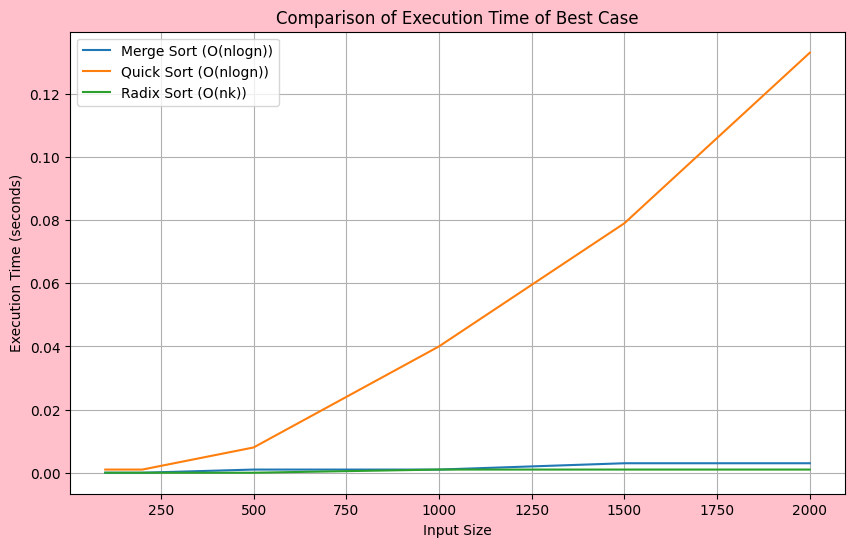

In [11]:
plt.figure(figsize=(10, 6),facecolor= 'pink')
plt.plot(input_sizes, mergeSort_times, label='Merge Sort (O(nlogn))')
plt.plot(input_sizes, quickSort_times, label='Quick Sort (O(nlogn))')
plt.plot(input_sizes, radixSort_times, label='Radix Sort (O(nk))')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Comparison of Execution Time of Best Case')
plt.grid(True)
plt.show()

In [27]:
import time
import random
import matplotlib.pyplot as plt

def measure_execution_time(func, input_size):
    numbers = [ i for i in range(input_size, 0, -1)]
    start_time = time.time()
    result = func(numbers)
    end_time = time.time()
    return end_time - start_time

def measure_radix_execution_time(func, input_size):
    numbers = [ i for i in range(input_size, 0, -1)]
    start_time = time.time()
    result = func(numbers, len(str(input_size)))
    end_time = time.time()
    return end_time - start_time
# Experiment with different input sizes
input_sizes = [100, 200, 500, 1000, 1500, 2000]
mergeSort_times = []
quickSort_times = []
radixSort_times = []

for size in input_sizes:
    mergeSort_time = measure_execution_time(mergeSort, size)
    quickSort_time = measure_execution_time(quickSort, size)
    radixSort_time = measure_radix_execution_time(radixSort, size)
    mergeSort_times.append(mergeSort_time)
    quickSort_times.append(quickSort_time)
    radixSort_times.append(radixSort_time)

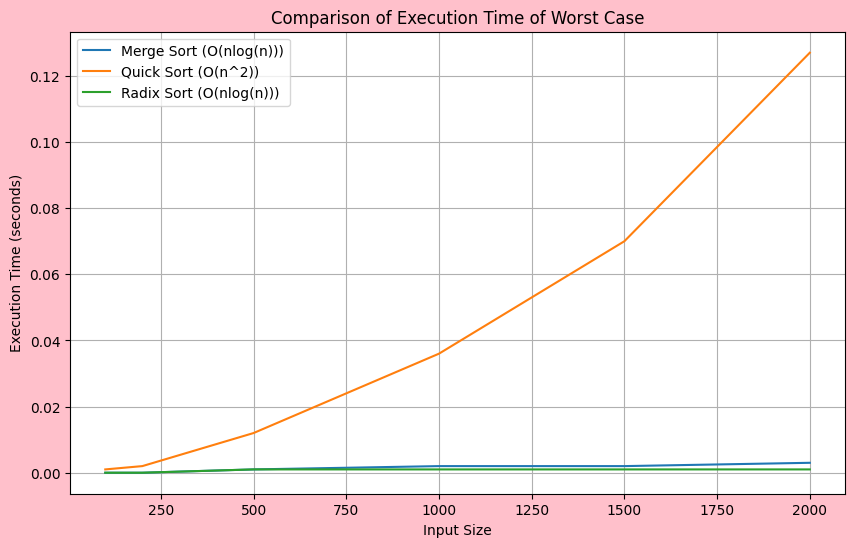

In [28]:
plt.figure(figsize=(10, 6),facecolor= 'pink')
plt.plot(input_sizes, mergeSort_times, label='Merge Sort (O(nlog(n)))')
plt.plot(input_sizes, quickSort_times, label='Quick Sort (O(n^2))')
plt.plot(input_sizes, radixSort_times, label='Radix Sort (O(nlog(n)))')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Comparison of Execution Time of Worst Case')
plt.grid(True)
plt.show()

# Conclusion

<div class="image" style="display:flex;">
    <img src="output4.png" style="width: 33%;"/>
    <img src="output5.png" style="width: 33%;"/>
    <img src="output6.png" style="width: 33%;"/>
</div>

* จากกราฟการเปรียบเทียบเวลาของกรณี Average Case พบว่า ไม่สามารถแยกความแตกต่างระหว่างกันได้ในช่วงข้อมูลตั้งแต่ 0 - 2000 เนื่องจากเวลาได้ออกมาใกล้เคียงกัน แต่ถ้าสังเกตจากช่วง n = 2000 ขึ้นไป จะสามารถแยกได้ทั้งสามมี O(nlogn) เหมือนกัน Merge Sort จะใช้เวลานานที่สุด ในขณะที่ Radix Sort ใช้เวลาน้อยกว่า แต่ Quick Sort เร็วที่สุดในกรณีนี้
* จากกราฟ Best Case และ Worst Case จะสามารถสรุปได้ว่า Quick Sort จะเป็น O(n^2) เพียงอัลกอริทึมเดียว ในขณะที่ Merge Sort และ Radix Sort ใช้เวลาไวมาก จนเกือบเทียบเท่า O(1) 
* เหตุผลที่ Quick Sort ใช้เวลาเยอะ เพราะในอัลกอริทึมของ Quick Sort นั้น ชุดข้อมูลที่เรียงแล้ว จะทำให้หลักการที่มันเลือก Pivot เป็นตัวแรกก่อนแล้วแยกกล่องออกมาจะมีขนาดข้อมูลไม่สมดุลกัน เช่น ใน Best Case เพราะกล่องที่มีค่ามากกว่าจะมีข้อมูลจำนวน n-1 ตัว หรือ Worst Case จะมีเฉพาะกล่องที่มีค่าน้อยกว่าจำนวน n-1 ตัว ซึ่งทั้งสองกรณีจะเลือก Pivot ใหม่ไปเรื่อยๆ และทำให้มันกลายเป็น O(n^2) นั่นเอง

---

<div style="color:pink;"> นางสาวปุญชญา จันทร์เจริญ 65070506039</div>
<div style="color:greenyellow;">นายศวิษฐ์ โกสียอัมพร 65070506026</div>